# Get Provenance Document from Rook WPS

* rook wps: https://github.com/roocs/rook
* wps documentation: http://geoprocessing.info/wpsdoc/


In [1]:
import os
import requests

In [2]:
# url = 'http://localhost:5000/wps'
url = 'http://cp4cds-cn1.dkrz.de/wps'

## Run Subset (sync mode)

In [3]:
collection = "c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest"
time = "1860-01-01/1900-12-30"

In [4]:
datainputs = f"DataInputs=collection={collection};time={time}"
req_url = f"{url}?service=WPS&version=1.0.0&request=Execute&identifier=subset&{datainputs}"
req_url

'http://cp4cds-cn1.dkrz.de/wps?service=WPS&version=1.0.0&request=Execute&identifier=subset&DataInputs=collection=c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest;time=1860-01-01/1900-12-30'

In [5]:
resp = requests.get(req_url)
resp.ok

True

In [6]:
print(resp.text)

<?xml version="1.0" encoding="UTF-8"?>
<wps:ExecuteResponse xmlns:wps="http://www.opengis.net/wps/1.0.0" xmlns:ows="http://www.opengis.net/ows/1.1" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.opengis.net/wps/1.0.0 ../wpsExecute_response.xsd" service="WPS" version="1.0.0" xml:lang="en-US" serviceInstance="http://compute.mips.copernicus-climate.eu:80/wps?request=GetCapabilities&amp;amp;service=WPS" statusLocation="">
    <wps:Process wps:processVersion="1.0">
        <ows:Identifier>subset</ows:Identifier>
        <ows:Title>Subset</ows:Title>
        <ows:Abstract>Run subsetting on climate model data. Calls daops operators.</ows:Abstract>
	</wps:Process>
    <wps:Status creationTime="2020-11-10T21:55:10Z">
        <wps:ProcessSucceeded>PyWPS Process Subset finished</wps:ProcessSucceeded>
	</wps:Status>
	<wps:ProcessOutputs>
		<wps:Output>
            <ows:Identifier>output</ows:Identifier>
            <o

### Metalink output

In [7]:
metalink_url = 'http://cp4cds-cn1.dkrz.de:80/outputs/rook/a669cac4-2396-11eb-becf-f2e4655a10b7/input.meta4'

In [8]:
print(requests.get(metalink_url).text)


<?xml version="1.0" encoding="UTF-8"?>
<metalink xmlns="urn:ietf:params:xml:ns:metalink">
    <published>2020-11-10T21:52:36Z</published>
    <generator>PyWPS/4.2.8</generator>

    <file name="tas_day_EC-EARTH_historical_r1i1p1_18600101-19001229.nc">
        <identity>NetCDF file</identity>
        <size>2308393</size>
        <metaurl mediatype="application/x-netcdf">http://cp4cds-cn1.dkrz.de:80/outputs/rook/a9e56082-2396-11eb-becf-f2e4655a10b7/tas_day_EC-EARTH_historical_r1i1p1_18600101-19001229.nc</metaurl>
        <publisher name="None" url="http://compute.mips.copernicus-climate.eu:80/wps"/>
    </file>

</metalink>


### Provenance Document

In [9]:
prov_json_url = 'http://cp4cds-cn1.dkrz.de:80/outputs/rook/a669cac4-2396-11eb-becf-f2e4655a10b7/provenance.json'

In [10]:
requests.get(prov_json_url).json()

{'prefix': {'project': 'https://cds.climate.copernicus.eu/nsproject',
  'software': 'https://cds.climate.copernicus.eu/nssoftware',
  'workflow': 'https://cds.climate.copernicus.eu/nsworkflow',
  'operator': 'https://cds.climate.copernicus.eu/nsoperator',
  'parameter': 'https://cds.climate.copernicus.eu/nsparameter',
  'collection': 'https://cds.climate.copernicus.eu/nscollection',
  'file': 'https://cds.climate.copernicus.eu/nsfile'},
 'agent': {'project:Copernicus Climate Data Store': {}},
 'activity': {'software:rook==0.1.0': {},
  'software:daops==0.2.0': {},
  'operator:subset': {'parameter:time': '1860-01-01/1900-12-30'}},
 'wasAttributedTo': {'_:id1': {'prov:entity': 'software:rook==0.1.0',
   'prov:agent': 'project:Copernicus Climate Data Store'}},
 'entity': {'collection:c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest': {},
  'file:http://cp4cds-cn1.dkrz.de:80/outputs/rook/a9e56082-2396-11eb-becf-f2e4655a10b7/tas_day_EC-EARTH_historical_r1i1p1_1860

### Provenance Plot

In [11]:
prov_plot_url = 'http://cp4cds-cn1.dkrz.de:80/outputs/rook/a669cac4-2396-11eb-becf-f2e4655a10b7/provenance.png'

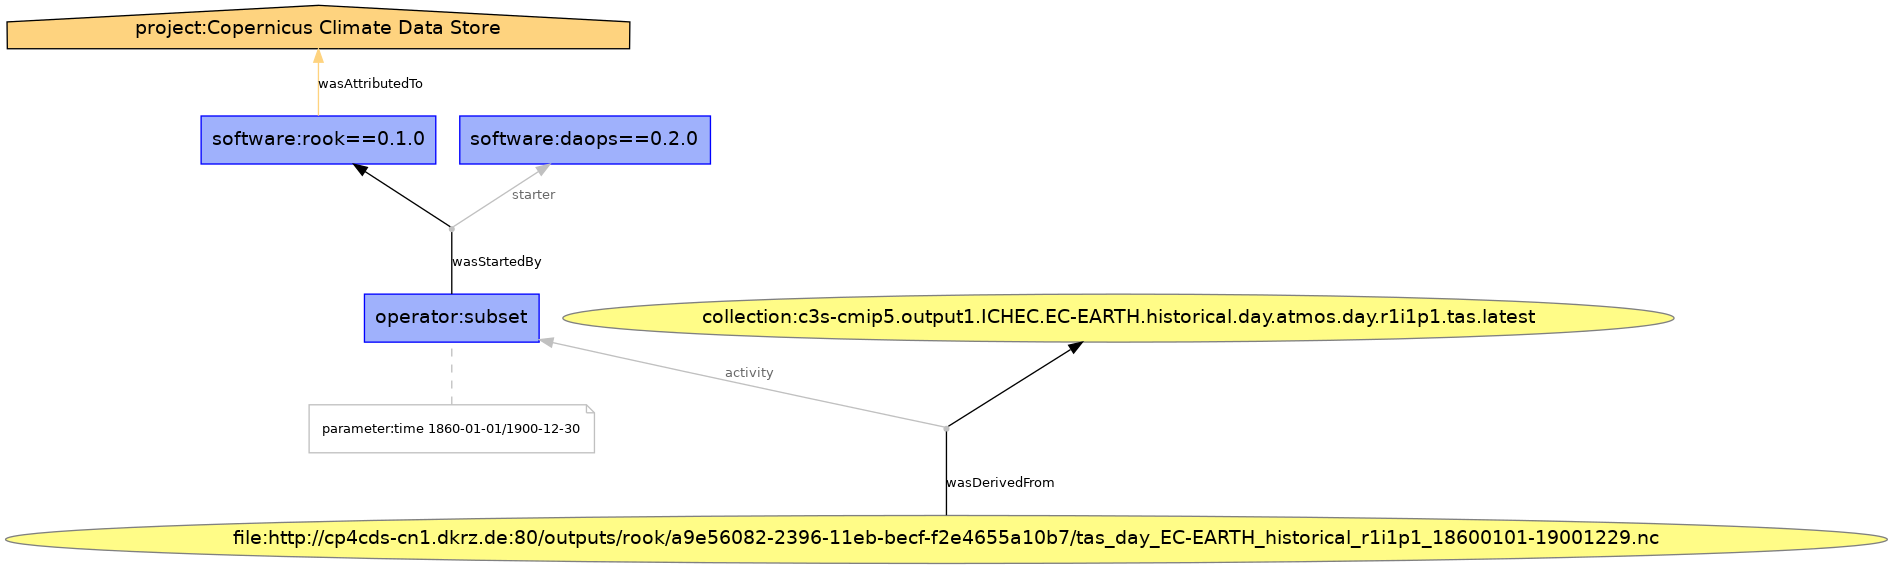

In [12]:
from IPython.display import Image
Image(prov_plot_url)